In [60]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D ,Flatten ,Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import time
import keras
import cv2
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
#load pickle generated in data prepare program
X = pickle.load(open('X_data.pkl','rb'))
y = pickle.load(open('y_data.pkl','rb'))

In [3]:
X = X/255

In [21]:

X=X.reshape(-1,100,100,1)

In [22]:
X.shape

(24946, 100, 100, 1)

In [23]:
#train test split form sklearn library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
NAME=f'cat_vs_dog_predictions-{int(time.time())}'
tensorboard = TensorBoard(log_dir=f'logs\\{NAME}\\')

In [137]:
#n -dimension of input
#p - paddle
#f - filter 
#s - stride
#((n+2p-f)/s )+1  <- formula to calculate size of input after passing filter 
#https://www.quora.com/How-can-I-calculate-the-size-of-output-of-convolutional-layer/answer/Rockson-Agyeman
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,input_shape = X.shape[1:], activation='relu'))
model.add(Dense(2,activation='softmax'))

In [138]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [139]:
model.fit(X_train,y_train,epochs=8,validation_split=0.2,batch_size=32,callbacks=[tensorboard])

Epoch 1/8
418/418 [==============================] - 57s 136ms/step - loss: 0.6599 - accuracy: 0.5854 - val_loss: 0.5655 - val_accuracy: 0.7092
Epoch 2/8
418/418 [==============================] - 60s 143ms/step - loss: 0.5340 - accuracy: 0.7283 - val_loss: 0.5361 - val_accuracy: 0.7320
Epoch 3/8
418/418 [==============================] - 60s 143ms/step - loss: 0.4689 - accuracy: 0.7745 - val_loss: 0.4503 - val_accuracy: 0.7882
Epoch 4/8
418/418 [==============================] - 61s 145ms/step - loss: 0.4138 - accuracy: 0.8112 - val_loss: 0.4082 - val_accuracy: 0.8157
Epoch 5/8
418/418 [==============================] - 59s 142ms/step - loss: 0.3452 - accuracy: 0.8450 - val_loss: 0.4088 - val_accuracy: 0.8080
Epoch 6/8
418/418 [==============================] - 60s 143ms/step - loss: 0.2815 - accuracy: 0.8756 - val_loss: 0.4347 - val_accuracy: 0.8175
Epoch 7/8
418/418 [==============================] - 59s 141ms/step - loss: 0.2077 - accuracy: 0.9141 - val_loss: 0.4685 - val_accuracy:

In [93]:
model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 33856)           

In [140]:
history_model= model.history

In [141]:
#use plotly library to make interactive graph just for fun

def plot_hist(history_model):
    hist = pd.DataFrame(history_model.history)
    hist['epoch'] = history_model.epoch

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['accuracy'], name='accuracy', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_accuracy'], name='val_accuracy', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Accuracy vs. Val Accuracy', xaxis_title='Epoki', yaxis_title='Accuracy', yaxis_type='log')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['loss'], name='loss', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_loss'], name='val_loss', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Loss vs. Val Loss', xaxis_title='Epoki', yaxis_title='Loss', yaxis_type='log')
    fig.show()

plot_hist(history_model)

In [27]:
history_model.history

{'loss': [0.6311181783676147,
  0.5442506074905396,
  0.47227123379707336,
  0.38736531138420105,
  0.28014615178108215],
 'accuracy': [0.6430423259735107,
  0.7255501747131348,
  0.7756798267364502,
  0.8223522305488586,
  0.8807260394096375],
 'val_loss': [0.5833994150161743,
  0.5287001132965088,
  0.4725072383880615,
  0.49691933393478394,
  0.5682834982872009],
 'val_accuracy': [0.6877990365028381,
  0.7350478172302246,
  0.7811004519462585,
  0.7811004519462585,
  0.7769138813018799]}

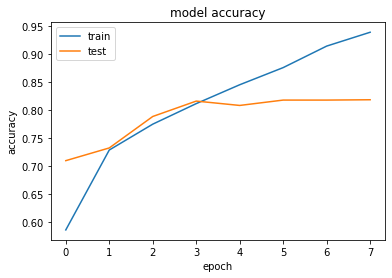

In [142]:
# old way to plot by matplotlib
plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [143]:
model.evaluate(X_test, y_test, batch_size=200,verbose=1)     


42/42 [==============================] - 6s 144ms/step - loss: 0.4866 - accuracy: 0.8202


[0.4865509867668152, 0.8202356100082397]

In [144]:
model.save('mymodelv3.model')

INFO:tensorflow:Assets written to: mymodelv3.model\assets


In [71]:
CATORDOG = ['Cat','Dog']


In [72]:
model=keras.models.load_model('mymodel.model')

In [158]:
path =r'D:\MachineLearning\sieci neuronowe\06_cnn\husky.jpg'
image =cv2.imread(path)
cv2.imshow('image of animal',image)
cv2.waitKey(0)

-1

In [159]:
def image(path):
    img =cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img,(100,100))
    new_arr = np.array(new_arr)
    new_arr= new_arr.reshape(-1,100,100,1)
    return new_arr

zwierzak = image(path)

In [160]:
prediction = model.predict([zwierzak])


In [161]:

print(CATORDOG[prediction.argmax()])

Dog
